# Explore multimapper % in TRA/TRB/TRG/TRD productive vs nonproductive

In [1]:
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sb
from itertools import compress
import random
import scirpy as ir
import os
import rpy2
%load_ext rpy2.ipython

sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]

In [2]:
sb.set_palette('colorblind')

In [3]:
# import utils
import sys
sys.path.append('/home/jovyan/chenqu_utils')
from array_operations import *

In [4]:
# set working directory
%cd /lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/

/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript


In [5]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/VDJ_collab/plots_output/chenqu_jhub/'
sc.settings.figdir = fig_path

# Load data

In [6]:
# combined contigs csv from panfetal_nonproductive.ipynb
vdj_combine = pd.read_csv('csv/panfetal_vdj_combine.csv',index_col=0)

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (53,93,94,95,96,97,98,99,100,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# filter for contigs in a cell only
vdj_cell = vdj_combine[~vdj_combine['celltype'].isna()]

In [8]:
# add column of j multimappers are present or not
vdj_cell['j_multi_present'] = vdj_cell['j_call_multiplicity'] > 1

<ipython-input-8-7b0651b0b23a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdj_cell['j_multi_present'] = vdj_cell['j_call_multiplicity'] > 1


In [9]:
# remove no j_call contigs
#vdj_cell = vdj_cell.loc[~vdj_cell['j_call'].isna(),:]

In [10]:
# remove contigs with j_call_multimappers being NaN - i.e. no j_call from blastn as our cutoff is more stringent than igblastn
vdj_cell = vdj_cell.loc[~vdj_cell['j_call_multiplicity'].isna(),:]

In [11]:
# take out the leftmost j gene in j_call_multimappers
vdj_cell['j_call_leftmost'] = [gene.split(';')[0] for gene in vdj_cell['j_call_multimappers']]

# output top 10 j multimappers for each locus

In [12]:
top_tbl = pd.DataFrame(index = ['TRA','TRB','TRG','TRD','IGH','IGL','IGK'], columns =range(20))

In [13]:
for locus in top_tbl.index:
    select = vdj_cell.loc[np.array(vdj_cell['locus']==locus) & np.array(vdj_cell['j_call_multiplicity']>1),:]
    counter = Counter(select['j_call_multimappers'])
    counter_df = pd.DataFrame.from_dict(counter, orient='index').sort_values(by=0, ascending=False)
    for i in range(min(10, counter_df.shape[0])):
        top_tbl.loc[locus, i*2] = counter_df.index[i]
        top_tbl.loc[locus, i*2+1] = counter_df.iloc[i,0]

In [15]:
top_tbl.to_csv('csv/top_10_j_multimappers.csv')
top_tbl.to_csv('/home/jovyan/mount/gdrive/VDJ_collab/manuscript/supplement/top_10_j_multimappers.csv')

In [16]:
top_tbl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TRA,TRAJ12*01;TRAJ10*01,102,TRAJ28*01;TRAJ27*01,88,TRAJ29*01;TRAJ27*01,20,TRAJ53*01;TRAJ49*01,19,TRAJ50*01;TRAJ49*01,18,TRAJ30*01;TRAJ27*01,11,TRAJ32*02;TRAJ27*01,10,TRAJ58*01;TRAJ49*01,7,TRAJ49*01;TRAJ10*01,7,TRAJ11*01;TRAJ10*01,6
TRB,TRBJ2-3*01;TRBJ2-4*01,2699,TRBJ2-2P*01;TRBJ2-3*01,2502,TRBJ1-3*01;TRBJ1-4*01,1364,TRBJ2-2P*01;TRBJ2-3*01;TRBJ2-4*01,1161,TRBJ2-5*01;TRBJ2-6*01;TRBJ2-7*01,1130,TRBJ1-1*01;TRBJ1-4*01,987,TRBJ1-2*01;TRBJ1-4*01,875,TRBJ2-5*01;TRBJ2-6*01,757,TRBJ2-6*01;TRBJ2-7*01,472,TRBJ2-3*01;TRBJ2-4*01;TRBJ2-5*01;TRBJ2-6*01,186
TRG,TRGJP1*01;TRGJ2*01,219,TRGJP1*01;TRGJ1*01,122,TRGJP2*01;TRGJ2*01,43,TRGJP*01;TRGJ2*01,35,TRGJP*01;TRGJ1*01,27,TRGJP*01;TRGJP1*01,1,TRBJ1-2*01;TRBJ1-1*01;TRGJP1*01,1,TRGJP1*01;TRGJP1*01,1,TRBJ2-5*01;TRGJP1*01,1,NaN,NaN
TRD,TRAJ11*01;TRAJ11*01,2,TRAJ10*01;TRAJ10*01,1,TRDJ1*01;TRDJ4*01,1,TRAJ45*01;TRDJ1*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGH,IGHJ1*01;IGHJ3*02,1274,IGHJ6*03;IGHJ4*02,765,IGHJ6*03;IGHJ3*02,326,IGHJ6*03;IGHJ2*01,163,IGHJ6*03;IGHJ5*02,112,IGHJ6*03;IGHJ6*02,86,IGHJ5*02;IGHJ6*02,35,IGHJ6*03;IGHJ6*03,34,IGHJ2*01;IGHJ1*01;IGHJ3*02,27,IGHJ5*02;IGHJ5*02,24
IGL,IGKJ1*01;IGLJ3*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGK,IGKJ4*01;IGKJ5*01,13,IGKJ3*01;IGKJ4*01,4,IGKJ1*01;IGKJ2*01,3,IGKJ4*02;IGKJ5*01,3,IGKJ5*01;IGKJ2*02,1,IGKJ3*01;IGKJ2*04;IGKJ4*01,1,IGKJ2*04;IGKJ3*01;IGKJ4*01,1,IGKJ3*01;IGKJ4*01;IGKJ5*01,1,IGKJ2*02;IGKJ1*01;IGKJ4*01;IGKJ5*01,1,IGKJ1*01;IGKJ2*01;IGKJ3*01,1


In [17]:
df_trb = pd.DataFrame({'sequence': vdj_cell.loc[vdj_cell['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','sequence'],
                      'c_call': vdj_cell.loc[vdj_cell['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','c_call']})
df_trb['match'] = False 

In [18]:
# sequence from TRBJ2-3 to TRBJ2-4 including untranslated region 
sequence = 'CACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCGGTAAGCGGGGGCTCCCGCTGAAGCCCCGGAACTGGGGAGGGGGCGCCCCGGGACGCCGGGGGCGTCGCAGGGCCAGTTTCTGTGCCGCGTCTCGGGGCTGTGAGCCAAAAACATTCAGTACTTCGGCGCCGGGACCCGGCTCTCAGTGCTGG'
# sequence from TRBJ2-3 to TRBJ2-4 including untranslated region with 1 SNP in the middle
sequence2 = 'CACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCGGTAAGCGGGGGCTCCCGCTGAAGCCCGGGAACTGGGGAGGGGGCGCCCCGGGACGCCGGGGGCGTCGCAGGGCCAGTTTCTGTGCCGCGTCTCGGGGCTGTGAGCCAAAAACATTCAGTACTTCGGCGCCGGGACCCGGCTCTCAGTGCTGG'

In [19]:
for contig in df_trb.index:
    df_trb.loc[contig, 'match'] = sequence2 in df_trb.loc[contig, 'sequence'] or sequence in df_trb.loc[contig, 'sequence'] 

In [20]:
sum(df_trb['match']) / df_trb.shape[0]

0.7488888888888889

In [21]:
vdj_cell.loc[vdj_cell['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','sequence'].to_csv('csv/TRB_top_multimapper_sequence.csv')
# Investigated a few contigs - majority cover from TRBJ2-3 to TRBJ2-4

In [22]:
vdj_cell.loc[vdj_cell['j_call_multimappers']=='IGHJ1*01;IGHJ3*02','sequence'].to_csv('csv/IGH_top_multimapper_sequence.csv')
# Investigated a few contigs against - looks like IGHJ2P; IGHJ3 instead of IGHJ1

# Check % of multimappers

In [12]:
# 4 columns that we care about in plotting
group_by=['sample','locus','v_gene_present','j_multi_present']

# make dataframe df
df = vdj_cell[group_by].drop_duplicates()
df = df[group_by].astype("str")
df.index = df[group_by].agg("-".join, axis=1)

# add column 'count' in df
vdj_cell[group_by] = vdj_cell[group_by].astype("str")
vdj_cell["sample-locus-v-j"] = vdj_cell[group_by].agg("-".join, axis=1)
count = vdj_cell.groupby('sample-locus-v-j').count().iloc[:,0]
df['count'] = 0
df['count'].update(count)

# add column with sample-locus-v
df['sample-locus-v'] = df[group_by[:-1]].agg("-".join, axis=1)

df

,sample,locus,v_gene_present,j_multi_present,count,sample-locus-v
FCAImmP7292031-TRB-False-True,FCAImmP7292031,TRB,False,True,298,FCAImmP7292031-TRB-False
FCAImmP7292031-TRB-False-False,FCAImmP7292031,TRB,False,False,193,FCAImmP7292031-TRB-False
FCAImmP7292031-TRB-True-False,FCAImmP7292031,TRB,True,False,236,FCAImmP7292031-TRB-True
FCAImmP7292031-TRA-False-False,FCAImmP7292031,TRA,False,False,61,FCAImmP7292031-TRA-False
FCAImmP7292031-TRA-True-False,FCAImmP7292031,TRA,True,False,163,FCAImmP7292031-TRA-True
...,...,...,...,...,...,...
Human_colon_16S8159190-IGL-False-False,Human_colon_16S8159190,IGL,False,False,6,Human_colon_16S8159190-IGL-False
Human_colon_16S8159190-IGH-False-True,Human_colon_16S8159190,IGH,False,True,3,Human_colon_16S8159190-IGH-False
Human_colon_16S8159190-IGH-True-True,Human_colon_16S8159190,IGH,True,True,4,Human_colon_16S8159190-IGH-True
Human_colon_16S8159190-IGK-False-False,Human_colon_16S8159190,IGK,False,False,2,Human_colon_16S8159190-IGK-False


In [13]:
# make new dataframe df_new to calculate percentage of j multimappers present
df_new = pd.DataFrame(index = set(df['sample-locus-v']))
df_new['j_multi_present'] = True

# add columns of sample, locus, v_gene_present
df_new['sample'] = [name.split('-')[0] for name in df_new.index]
df_new['locus'] = [name.split('-')[1] for name in df_new.index]
df_new['v_gene_present'] = [name.split('-')[2] for name in df_new.index]

# add new column of sample-locus-v-j to find count from df
df_new[group_by] = df_new[group_by].astype("str")
df_new['sample-locus-v-j'] = df_new[group_by].agg("-".join, axis=1)
df_new['count'] = lookup(df_new['sample-locus-v-j'], df, -1, 'count')
df_new['count'] = df_new['count'].fillna(0)

# add column 'total_count' - total count is total no. of contigs for each sample-locus-v 
df_new['total_count'] = 0
total_count = df.groupby('sample-locus-v').sum().iloc[:,0]
df_new['total_count'].update(total_count)

# calculate percentage of count/total_count
df_new['j_multi_perc'] = df_new['count'] / df_new ['total_count'] * 100

df_new

,j_multi_present,sample,locus,v_gene_present,sample-locus-v-j,count,total_count,j_multi_perc
Human_colon_16S8159182-IGL-True,True,Human_colon_16S8159182,IGL,True,Human_colon_16S8159182-IGL-True-True,0.0,14,0.000000
Human_colon_16S8159183-TRB-True,True,Human_colon_16S8159183,TRB,True,Human_colon_16S8159183-TRB-True-True,0.0,26,0.000000
FCAImmP7555856-TRD-False,True,FCAImmP7555856,TRD,False,FCAImmP7555856-TRD-False-True,0.0,244,0.000000
FCAImmP7964506-IGK-True,True,FCAImmP7964506,IGK,True,FCAImmP7964506-IGK-True-True,2.0,203,0.985222
FCAImmP7555861-TRG-True,True,FCAImmP7555861,TRG,True,FCAImmP7555861-TRG-True-True,9.0,550,1.636364
...,...,...,...,...,...,...,...,...
FCAImmP7579230-IGH-True,True,FCAImmP7579230,IGH,True,FCAImmP7579230-IGH-True-True,1.0,4,25.000000
Human_colon_16S8159188-TRD-False,True,Human_colon_16S8159188,TRD,False,Human_colon_16S8159188-TRD-False-True,0.0,168,0.000000
FCAImmP7803029-IGH-False,True,FCAImmP7803029,IGH,False,FCAImmP7803029-IGH-False-True,86.0,376,22.872340
Human_colon_16S8159190-IGL-True,True,Human_colon_16S8159190,IGL,True,Human_colon_16S8159190-IGL-True-True,0.0,19,0.000000


In [14]:
# only keep the ones with total_count >=10
df_plot = df_new[df_new['total_count']>=10]

In [15]:
df_plot['v_gene_present'] = df_plot['v_gene_present'].astype('category')
df_plot['v_gene_present'] = df_plot['v_gene_present'].cat.reorder_categories(['True','False'])

<ipython-input-15-cc98ba25bc09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['v_gene_present'] = df_plot['v_gene_present'].astype('category')
<ipython-input-15-cc98ba25bc09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['v_gene_present'] = df_plot['v_gene_present'].cat.reorder_categories(['True','False'])


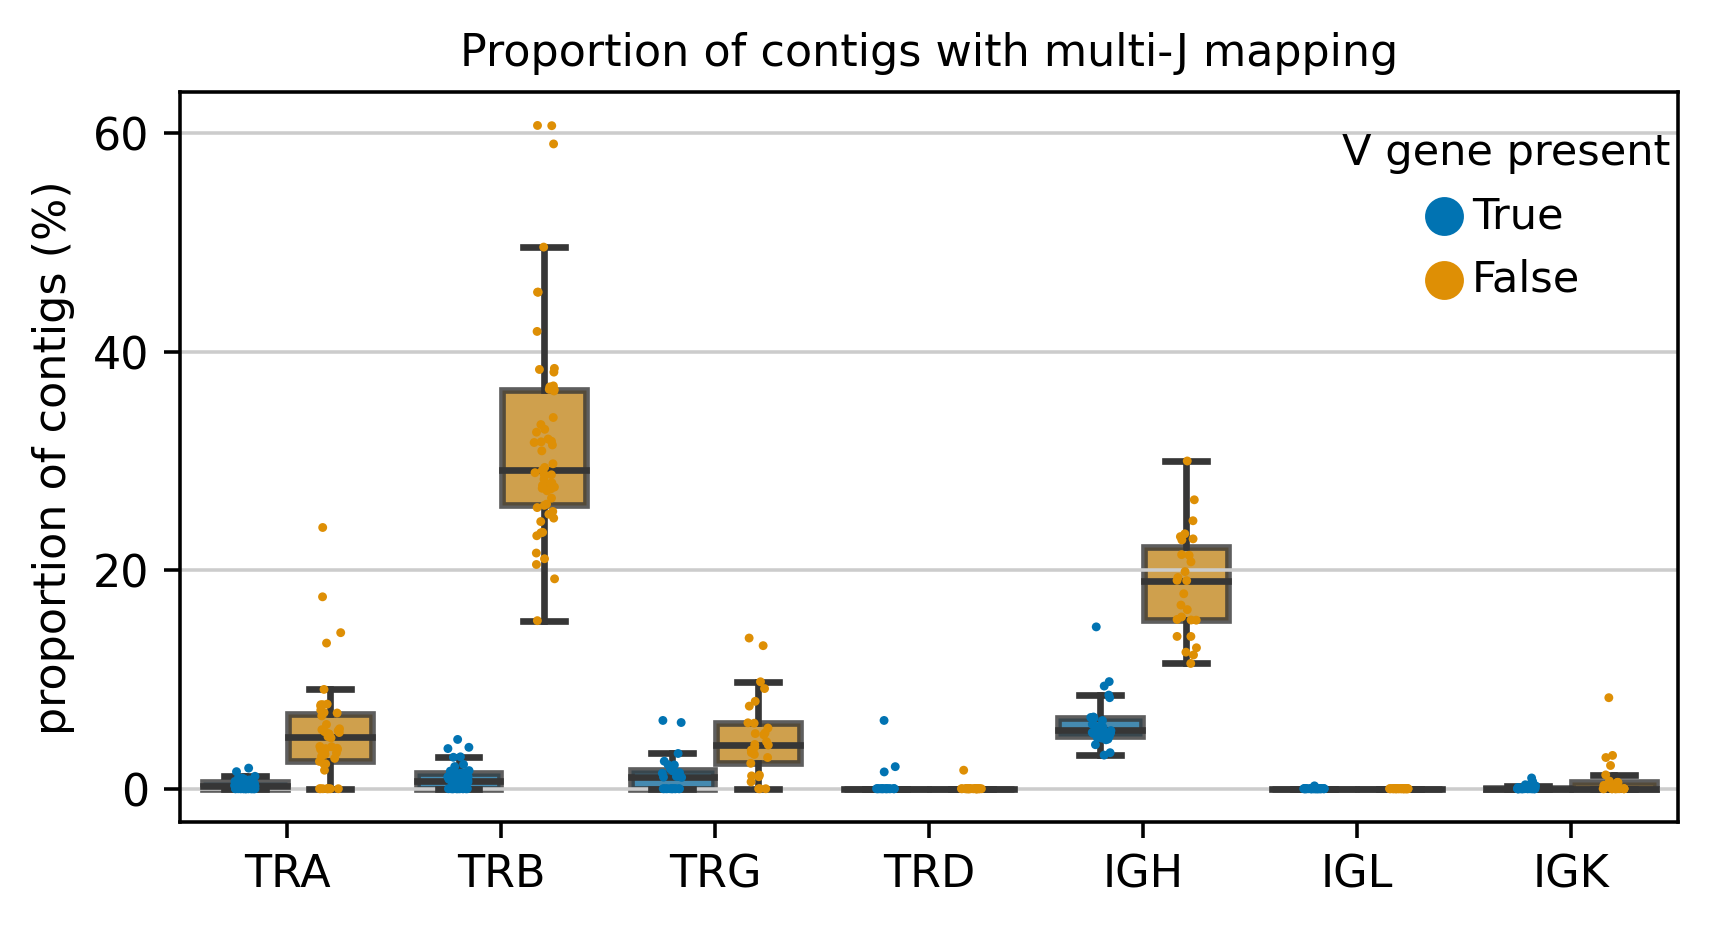

In [16]:
plt.figure(figsize=(6, 3))
order = ['TRA','TRB','TRG','TRD','IGH','IGL','IGK']
ax = sb.boxplot(x="locus", y="j_multi_perc", hue='v_gene_present',order=order,data=df_plot,dodge=True, showfliers = False, boxprops=dict(alpha=.8))
ax = sb.stripplot(x="locus", y="j_multi_perc", hue='v_gene_present',order=order,data=df_plot,
                 size=2, dodge=True)
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('proportion of contigs (%)',fontsize=10)
#ax.set(ylim=(0, 70))
plt.title('Proportion of contigs with multi-J mapping',fontsize=10)
h,l = ax.get_legend_handles_labels()
plt.rcParams['legend.title_fontsize'] = 'x-small'
l1 = ax.legend(h[2:],l[2:],title='V gene present', loc='upper left',frameon=False, bbox_to_anchor=(0.75, 1),fontsize='x-small')
plt.savefig(fig_path+'j_multimapper_perc.pdf',bbox_inches='tight');

wilcoxon rank sum test for p values

In [28]:
test_res = pd.DataFrame(index = order, columns = ['pval'])
for locus in test_res.index:
    df_select = df_plot[df_plot['locus']==locus]
    a = df_select.loc[df_select['v_gene_present']=='True',"j_multi_perc"]
    b = df_select.loc[df_select['v_gene_present']=='False',"j_multi_perc"]
    
    test_res.loc[locus, 'pval'] = sp.stats.ranksums(a, b)[1]
test_res

,pval
TRA,1.077e-09
TRB,3.33377e-19
TRG,6.53135e-05
TRD,0.489173
IGH,6.55551e-11
IGL,0.837912
IGK,0.0960497


# Logistic regression to look at what influence J_multimappers

In [29]:
df = vdj_cell[['j_multi_present','sample','celltype','locus','v_gene_present','j_call_leftmost']]

In [30]:
df.loc[df['j_multi_present']=='True','j_multi_present'] = 1
df.loc[df['j_multi_present']=='False','j_multi_present'] = 0
df['j_multi_present'] = df['j_multi_present'].astype('int')

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-30-e863c489146d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['j_multi_present']=='True','j_multi_present'] = 1
<ipython-input-30-e863c489146d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['j_multi_present']=='Fals

In [31]:
df.to_csv('csv/LR.csv')

In [32]:
%%R -i df

fit <- glm(j_multi_present ~ celltype + v_gene_present + j_call_leftmost, data=df, family='binomial')
results = as.data.frame(summary(fit)$coefficients)
results$adj_pval = p.adjust(results$`Pr(>|z|)`, method = 'BH')

results[results$adj_pval<0.05,]

                             Estimate Std. Error     z value      Pr(>|z|)
(Intercept)                -0.8611276 0.10656677   -8.080639  6.442813e-16
celltypeB1                  0.8616863 0.12254884    7.031370  2.045147e-12
celltypeCD4+T              -0.4615508 0.09093254   -5.075749  3.859723e-07
celltypeCYCLING_B           0.5387014 0.15373193    3.504161  4.580488e-04
celltypeCYCLING_ILC         0.7555426 0.30829831    2.450687  1.425840e-02
celltypeCYCLING_MPP         0.8140947 0.34359794    2.369324  1.782066e-02
celltypeCYCLING_NK          0.6571692 0.10148062    6.475810  9.430455e-11
celltypeCYCLING_PDC         1.4614000 0.45493421    3.212333  1.316618e-03
celltypeDC_PROGENITOR       2.2144876 0.90993664    2.433672  1.494652e-02
celltypeDN(P)_T             0.3699414 0.08273263    4.471529  7.766215e-06
celltypeDN(Q)_T             0.2049865 0.08739924    2.345404  1.900648e-02
celltypeDP(P)_T             0.8781734 0.07671348   11.447446  2.421759e-30
celltypeDP(Q)_T          

In [33]:
%%R 
write.csv(results, 'csv/LR_results.csv')
write.csv(results, '/home/jovyan/mount/gdrive/VDJ_collab/manuscript/supplement/LR_results.csv')